In [2]:
library("microeco")
library(file2meco)
library(qiime2R)
library(ggplot2)
library(microbiome)
library(phyloseq)
library("tidyverse")
library("dplyr")
library(ggpubr)
library(phyloseq)
library(microViz)
library("agricolae")
library(Maaslin2)
library(ggpubr)

In [3]:
abund_file_path <- system.file("extdata", "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/merged_tables_BacArc_fill_EPA2.qza", package="file2meco")
sample_file_path <- system.file("extdata", "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/meta_EPA2.csv", package="file2meco")
taxonomy_file_path <- system.file("extdata", "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/tax_EPA2.qza", package="file2meco")


In [5]:

# construct microtable object
#qiime2meco(abund_file_path)
#qiime2meco(abund_file_path, sample_table = sample_file_path, taxonomy_table = taxonomy_file_path)

ERROR: Error in read_qza(feature_table): Input artifact () not found. Please check path and/or use list.files() to see files in current working directory.


In [6]:
ASV_qza <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/merged_tables_BacArc_fill_EPA2.qza")
ASV_table <- ASV_qza$data
head(ASV_table)

dim(ASV_table)


taxa_qza <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/tax_EPA2.qza")
taxa_table <- taxa_qza$data
taxa_table <- taxa_qza$data %>%
as_tibble() %>% 
#select(-Confidence) %>% 
separate(Taxon, sep=";", c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species")) %>%
arrange(Feature.ID) %>%
mutate(ASVs =paste('ASV',1:n(), sep = "_")) %>%
column_to_rownames("Feature.ID")%>%
as.matrix()


#read metadata file and set factor order
meta = read.csv("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/metadata/meta_EPA2.csv",
               header=TRUE, row.names=1)
meta$Site_Num <- as.integer(meta$Site_Num)
meta$Site.Status <- factor(meta$Site.Status, levels = c("Vulnerable",
                                                         "Epidemic","Endemic"))
head(meta, n=2)
dim(meta)

,R1.1.W,R1.10.W,R1.11.W,R1.12.W,R1.13.W,R1.14.W,R1.15.W,R1.16.W,R1.17.W,R1.18.W,⋯,GR.SINT.En4,GR.SINT.En5,GR.SINT.En6,TP.DLAB.En1,TP.DLAB.En2,TP.DLAB.En3,TP.DLAB.En4,TP.DLAB.En5,TP.DLAB.En6,TP.DSTO.En1
72caa013fe7649c65ffe72138ff7dfd1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2b248f10cca3c82a2640506132f9c869,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4af34e31f4f29f5372246db273985eb8,12,18,24,19,20,28,21,23,19,26,⋯,0,0,38,0,197,37,149,198,14,0
516a7dfb3358a03ad54608b2bfe54ded,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
63c48fb71320865b89f020cc70ce9bae,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5ca9f99167b7bf31249f42965de904ff,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 11756  1109

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 103262 rows [1, 2, 3, 7,
8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 24, 26, 27, ...].”


,samp,Sample.ID,Site,Site.Name,Region,Project,Objective,Type,Species_sample,Sample.Type,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CG.DSTO.En1,CG.DSTO.En1_S6,CG.DSTO.En1_S6,NA,Cliff.Green,Lower Keys,EPA2,cor,Coral,DSTO,Healthy,⋯,0,0,1,0,0,0,0,0,0,0
CG.DSTO.En2,CG.DSTO.En2_S6,CG.DSTO.En2_S6,NA,Cliff.Green,Lower Keys,EPA2,cor,Coral,DSTO,Healthy,⋯,0,0,1,0,0,0,0,0,0,0


[1] 360  32

In [7]:
ps = phyloseq(otu_table(ASV_table, taxa_are_rows=TRUE), 
               sample_data(meta),
tax_table(taxa_table))
ps %>% tax_fix()

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11756 taxa and 360 samples ]
sample_data() Sample Data:       [ 360 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 11756 taxa by 9 taxonomic ranks ]

In [8]:
phyloseq2meco(ps)

477 taxa with 0 abundance are removed from the otu_table ...



microtable-class object:
sample_table have 360 rows and 32 columns
otu_table have 11279 rows and 360 columns
tax_table have 11756 rows and 9 columns

In [9]:
ps_coral= subset_samples(ps, Type=="Coral")
ps_coral_fill = filter_taxa(ps_coral, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_coral_fill 

# Subset samples healthy and then by species
ps_AH <- subset_samples(ps_coral, Sample.Type=="Healthy")

ps_AH_fill = filter_taxa(ps_AH, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_AH_fill 
                            
ps_ah_DSTO=subset_samples(ps_AH, Species_sample=="DSTO")
ps_ah_DSTO
ps_ah_SINT=subset_samples(ps_AH, Species_sample=="SINT")
ps_ah_SINT
ps_ah_MCAV=subset_samples(ps_AH, Species_sample=="MCAV")
ps_ah_MCAV
ps_ah_OFAV=subset_samples(ps_AH, Species_sample=="OFAV")
ps_ah_OFAV
ps_ah_PSTR=subset_samples(ps_AH, Species_sample=="PSTR")
ps_ah_PSTR

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1304 taxa and 174 samples ]
sample_data() Sample Data:       [ 174 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 1304 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 915 taxa and 117 samples ]
sample_data() Sample Data:       [ 117 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 915 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11756 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 11756 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11756 taxa and 17 samples ]
sample_data() Sample Data:       [ 17 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 11756 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11756 taxa and 28 samples ]
sample_data() Sample Data:       [ 28 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 11756 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11756 taxa and 29 samples ]
sample_data() Sample Data:       [ 29 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 11756 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 11756 taxa and 27 samples ]
sample_data() Sample Data:       [ 27 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 11756 taxa by 9 taxonomic ranks ]

In [10]:
ps_fill_dsto = filter_taxa(ps_ah_DSTO, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_dsto
ps_fill_sint = filter_taxa(ps_ah_SINT, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_sint
ps_fill_mcav = filter_taxa(ps_ah_MCAV, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_mcav
ps_fill_ofav = filter_taxa(ps_ah_OFAV, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_ofav               
ps_fill_pstr = filter_taxa(ps_ah_PSTR, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_pstr                           

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1427 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 1427 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2016 taxa and 17 samples ]
sample_data() Sample Data:       [ 17 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 2016 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 535 taxa and 28 samples ]
sample_data() Sample Data:       [ 28 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 535 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 805 taxa and 29 samples ]
sample_data() Sample Data:       [ 29 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 805 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1222 taxa and 27 samples ]
sample_data() Sample Data:       [ 27 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 1222 taxa by 9 taxonomic ranks ]

In [11]:
# Subset samples for Sediment type
ps_Sediment <- subset_samples(ps, subset = sample_data(ps)$Type == "Sediment")

ps_fill_s = filter_taxa(ps_Sediment, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_s

ps_Water <- subset_samples(ps, subset = sample_data(ps)$Type == "Water")

ps_fill_w = filter_taxa(ps_Water, function(x) sum(x > 5) > (0.1*length(x)), TRUE)
ps_fill_w


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4389 taxa and 90 samples ]
sample_data() Sample Data:       [ 90 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 4389 taxa by 9 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 940 taxa and 96 samples ]
sample_data() Sample Data:       [ 96 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 940 taxa by 9 taxonomic ranks ]

In [12]:
ps_merge_AH=merge_phyloseq(
   
                        ps_fill_dsto, ps_fill_sint, ps_fill_mcav, ps_fill_ofav,ps_fill_pstr)

ps_merge_AH

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2858 taxa and 117 samples ]
sample_data() Sample Data:       [ 117 samples by 32 sample variables ]
tax_table()   Taxonomy Table:    [ 2858 taxa by 9 taxonomic ranks ]

In [13]:
meco_merge_AH=phyloseq2meco(ps_merge_AH)
meco_merge_s=phyloseq2meco(ps_fill_s)
meco_merge_w=phyloseq2meco(ps_fill_w)

In [14]:
t1 <- trans_func$new(meco_merge_AH)
t1$cal_spe_func(prok_database = "FAPROTAX")
t1$cal_spe_func_perc(abundance_weighted = TRUE)
# use list to prepare data
tmp <- list()
# transpose res_spe_func_perc to be a data.frame like taxonomic abundance
tmp$func <- as.data.frame(t(t1$res_spe_func_perc), check.names = FALSE)
# assign the list as taxa_abund in your microtable object
dataset$taxa_abund <- tmp
head(tmp$func)

FAPROTAX v1.2.7. Please also cite the original FAPROTAX paper: Louca et al. (2016).

Decoupling function and taxonomy in the global ocean microbiome. Science, 353(6305), 1272.


The functional binary table is stored in object$res_spe_func ...

The result table is stored in object$res_spe_func_perc ...



,R3S7A1,R3S7A2,R3S7A3,R3S7A4,R3S7A5,CG.DSTO.En1,CG.DSTO.En2,CG.DSTO.En3,CG.DSTO.En4,CG.DSTO.En5,⋯,LP.PSTR.En2,LP.PSTR.En3,LP.PSTR.En4,LP.PSTR.En5,LP.PSTR.En6,LP.PSTR1.H,LP.PSTR3.H,LP.PSTR4.H,LP.PSTR5.H,LP.PSTR6.H
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
methanotrophy,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.02,0.00,0.02,⋯,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
methanol_oxidation,0.03,0.00,0.00,0.02,0.00,0.45,0.86,1.14,0.48,0.43,⋯,1.87,9.19,0.68,1.33,3.67,0.25,0.28,0.57,0.40,0.20
methylotrophy,0.03,0.00,0.00,0.02,0.00,0.45,0.86,1.14,0.48,0.43,⋯,1.87,9.19,0.68,1.33,3.67,0.25,0.28,0.57,0.40,0.20
aerobic_ammonia_oxidation,0.20,0.52,0.05,0.00,0.10,0.10,0.16,0.09,0.18,0.00,⋯,0.06,0.07,0.07,0.22,0.00,0.12,0.05,0.02,0.10,0.05
nitrification,0.20,0.52,0.05,0.00,0.10,0.10,0.16,0.09,0.18,0.00,⋯,0.06,0.07,0.07,0.22,0.00,0.12,0.05,0.02,0.10,0.05
sulfate_respiration,0.56,0.23,2.21,0.10,1.36,0.23,0.22,0.00,0.07,0.03,⋯,0.08,0.11,0.06,0.40,0.01,0.26,0.04,0.29,0.36,0.17


In [15]:
ps_far_AH = phyloseq(otu_table(tmp$func, taxa_are_rows=TRUE), 
               sample_data(meta))
ps_far_AH

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 43 taxa and 117 samples ]
sample_data() Sample Data:       [ 117 samples by 32 sample variables ]

In [77]:
sum_far_AH  <- ps_far_AH %>%
  #tax_glom(taxrank = "order") %>%
 # transform_sample_counts(function(x) {log(x) +1} ) %>% # Transform to rel. abundance
  psmelt()

head(sum_far_AH)

,Sample,OTU,Abundance,samp,Sample.ID,Site,Site.Name,Region,Project,Objective,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1364,CG.SINT.En4,intracellular_parasites,84.85,CG.SINT.En4_S6,CG.SINT.En4_S6,NA,Cliff.Green,Lower Keys,EPA2,cor,⋯,0,0,1,0,0,0,0,0,0,0
1622,CG.SINT4.H,intracellular_parasites,76.54,CG.SINT4.H_S3,CG.SINT4.H_S3,NA,Cliff.Green,Lower Keys,EPA2,cor,⋯,0,0,0,1,0,0,0,0,0,0
4213,XP.OFAV.En3,chemoheterotrophy,70.14,XP.OFAV.En3_S5,XP.OFAV.En3_S5,Site-G,Xesto.Patch,Lower Keys,EPA2,cor,⋯,0,0,1,0,0,0,0,0,0,0
1579,CG.SINT3.H,intracellular_parasites,68.60,CG.SINT3.H_S3,CG.SINT3.H_S3,NA,Cliff.Green,Lower Keys,EPA2,cor,⋯,0,0,0,1,0,0,0,0,0,0
945,CG.DSTO.En5,chemoheterotrophy,67.92,CG.DSTO.En5_S6,CG.DSTO.En5_S6,NA,Cliff.Green,Lower Keys,EPA2,cor,⋯,0,0,1,0,0,0,0,0,0,0
2880,LP.PSTR.En4,chemoheterotrophy,67.19,LP.PSTR.En4_S6,LP.PSTR.En4_S6,Site-H,Lindsays.Patch,Lower Keys,EPA2,cor,⋯,0,0,1,0,0,0,0,0,0,0


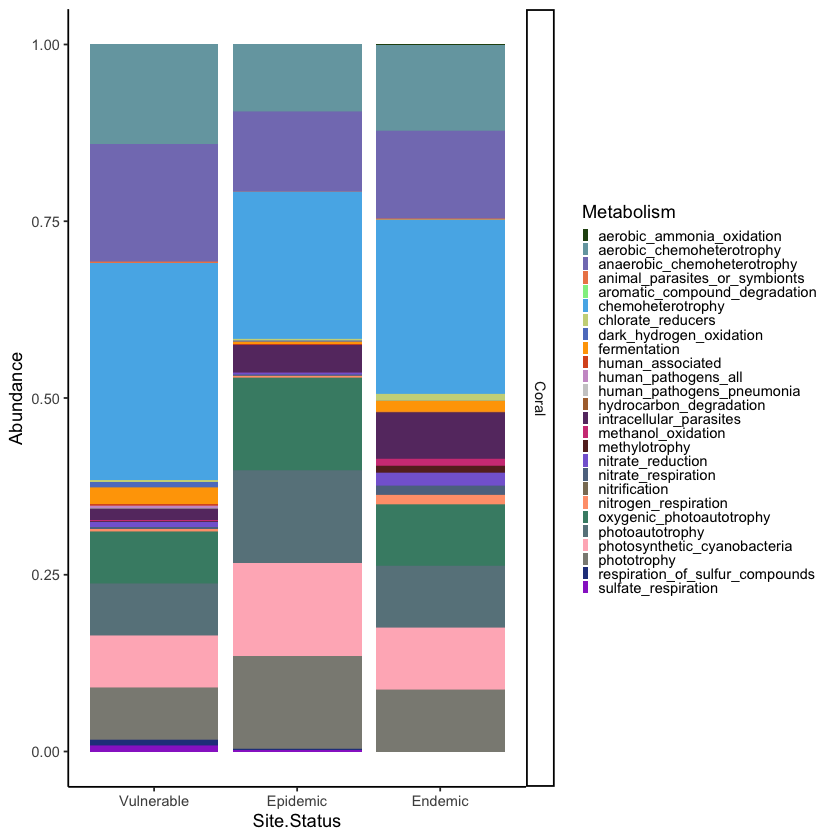

In [20]:
sum_far_AH %>%
filter(Abundance>=0.9) %>%
ggplot(aes(x =Site.Status, y=Abundance, fill=OTU)) + 
       
geom_bar(stat="identity", position="fill", aes(fill = OTU)) + 
#facet_grid(Samp_trip~Genotype, scales = "free") +
facet_grid(Type~., space="free") +
scale_fill_manual("Metabolism",values=c("#274e13","#76a5af","#837dbe", "#ed8655", "lightgreen",
                           "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic()   

In [16]:
t1 <- trans_func$new(meco_merge_s)
t1$cal_spe_func(prok_database = "FAPROTAX")
t1$cal_spe_func_perc(abundance_weighted = TRUE)
# use list to prepare data
tmp <- list()
# transpose res_spe_func_perc to be a data.frame like taxonomic abundance
tmp$func <- as.data.frame(t(t1$res_spe_func_perc), check.names = FALSE)
# assign the list as taxa_abund in your microtable object
dataset$taxa_abund <- tmp
head(tmp$func)
ps_far_s = phyloseq(otu_table(tmp$func, taxa_are_rows=TRUE), 
               sample_data(meta))
ps_far_s

FAPROTAX v1.2.7. Please also cite the original FAPROTAX paper: Louca et al. (2016).

Decoupling function and taxonomy in the global ocean microbiome. Science, 353(6305), 1272.


The functional binary table is stored in object$res_spe_func ...

The result table is stored in object$res_spe_func_perc ...



,R3.1.S,R3.10.S,R3.11.S,R3.12.S,R3.13.S,R3.14.S,R3.15.S,R3.16.S,R3.17.S,R3.18.S,⋯,XP.En1.S,XP.En10.S,XP.En12.S,XP.En2.S,XP.En3.S,XP.En5.S,XP.En6.S,XP.En7.S,XP.En8.S,XP.En9.S
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
methanol_oxidation,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.03,0.01,0.04,0.01,0.02,0.01,0.00,0.00,0.01
methylotrophy,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.03,0.01,0.04,0.01,0.02,0.01,0.00,0.00,0.01
aerobic_ammonia_oxidation,4.37,3.86,3.59,1.30,3.70,1.09,3.01,6.70,2.12,6.52,⋯,4.33,8.79,5.33,4.55,5.93,8.13,7.95,5.18,8.96,5.86
aerobic_nitrite_oxidation,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,⋯,0.05,0.00,0.05,0.03,0.05,0.01,0.10,0.05,0.00,0.02
nitrification,4.37,3.86,3.59,1.30,3.70,1.09,3.01,6.70,2.12,6.54,⋯,4.39,8.79,5.39,4.58,5.98,8.14,8.05,5.23,8.96,5.88
sulfate_respiration,12.56,10.74,6.44,6.32,5.94,3.10,8.89,6.91,7.27,7.79,⋯,4.88,3.73,5.17,4.92,7.12,4.64,4.90,6.99,10.56,5.28


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 37 taxa and 90 samples ]
sample_data() Sample Data:       [ 90 samples by 32 sample variables ]

In [17]:
t1 <- trans_func$new(meco_merge_w)
t1$cal_spe_func(prok_database = "FAPROTAX")
t1$cal_spe_func_perc(abundance_weighted = TRUE)
# use list to prepare data
tmp <- list()
# transpose res_spe_func_perc to be a data.frame like taxonomic abundance
tmp$func <- as.data.frame(t(t1$res_spe_func_perc), check.names = FALSE)
# assign the list as taxa_abund in your microtable object
dataset$taxa_abund <- tmp
head(tmp$func)
ps_far_w = phyloseq(otu_table(tmp$func, taxa_are_rows=TRUE), 
               sample_data(meta))
ps_far_w

FAPROTAX v1.2.7. Please also cite the original FAPROTAX paper: Louca et al. (2016).

Decoupling function and taxonomy in the global ocean microbiome. Science, 353(6305), 1272.


The functional binary table is stored in object$res_spe_func ...

The result table is stored in object$res_spe_func_perc ...



,R3.1.W,R3.10.W,R3.11.W,R3.12.W,R3.13.W,R3.14.W,R3.15.W,R3.16.W,R3.17.W,R3.18.W,⋯,XP.En9.W,CG.En11.W,CG.En12.W,CG.En2.W,CG.En3.W,CG.En4.W,CG.En5.W,CG.En7.W,CG.En8.W,CG.En9.W
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
methanol_oxidation,0.06,0.06,0.07,0.10,0.06,0.07,0.08,0.07,0.07,0.07,⋯,0.59,0.15,0.15,0.10,0.18,0.26,0.22,0.15,0.14,0.08
methylotrophy,0.06,0.06,0.07,0.10,0.06,0.07,0.08,0.07,0.07,0.07,⋯,0.59,0.15,0.15,0.10,0.18,0.26,0.22,0.15,0.14,0.08
aerobic_ammonia_oxidation,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,⋯,0.01,0.03,0.02,0.01,0.00,0.01,0.02,0.01,0.02,0.02
nitrification,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,⋯,0.01,0.03,0.02,0.01,0.00,0.01,0.02,0.01,0.02,0.02
sulfate_respiration,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,⋯,0.04,0.05,0.04,0.07,0.03,0.03,0.02,0.02,0.05,0.03
respiration_of_sulfur_compounds,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.01,⋯,0.04,0.05,0.04,0.07,0.03,0.03,0.02,0.02,0.05,0.03


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 36 taxa and 96 samples ]
sample_data() Sample Data:       [ 96 samples by 32 sample variables ]

In [18]:
sum_far  <- ps_far_w %>%
  #tax_glom(taxrank = "order") %>%
  #transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
  psmelt()

head(sum_far)

,Sample,OTU,Abundance,samp,Sample.ID,Site,Site.Name,Region,Project,Objective,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
393,CG10.W,photoautotrophy,28.97,CG10.W_S8,CG10.W_S8,NA,Cliff.Green,Lower Keys,EPA2,water,⋯,2,0,0,0,0,0,0,0,0,1
394,CG10.W,phototrophy,28.97,CG10.W_S8,CG10.W_S8,NA,Cliff.Green,Lower Keys,EPA2,water,⋯,2,0,0,0,0,0,0,0,0,1
389,CG10.W,photosynthetic_cyanobacteria,28.85,CG10.W_S8,CG10.W_S8,NA,Cliff.Green,Lower Keys,EPA2,water,⋯,2,0,0,0,0,0,0,0,0,1
392,CG10.W,oxygenic_photoautotrophy,28.85,CG10.W_S8,CG10.W_S8,NA,Cliff.Green,Lower Keys,EPA2,water,⋯,2,0,0,0,0,0,0,0,0,1
609,CG5.W,photoautotrophy,26.78,CG5.W_S8,CG5.W_S8,NA,Cliff.Green,Lower Keys,EPA2,water,⋯,2,0,0,0,0,0,0,0,0,1
610,CG5.W,phototrophy,26.78,CG5.W_S8,CG5.W_S8,NA,Cliff.Green,Lower Keys,EPA2,water,⋯,2,0,0,0,0,0,0,0,0,1


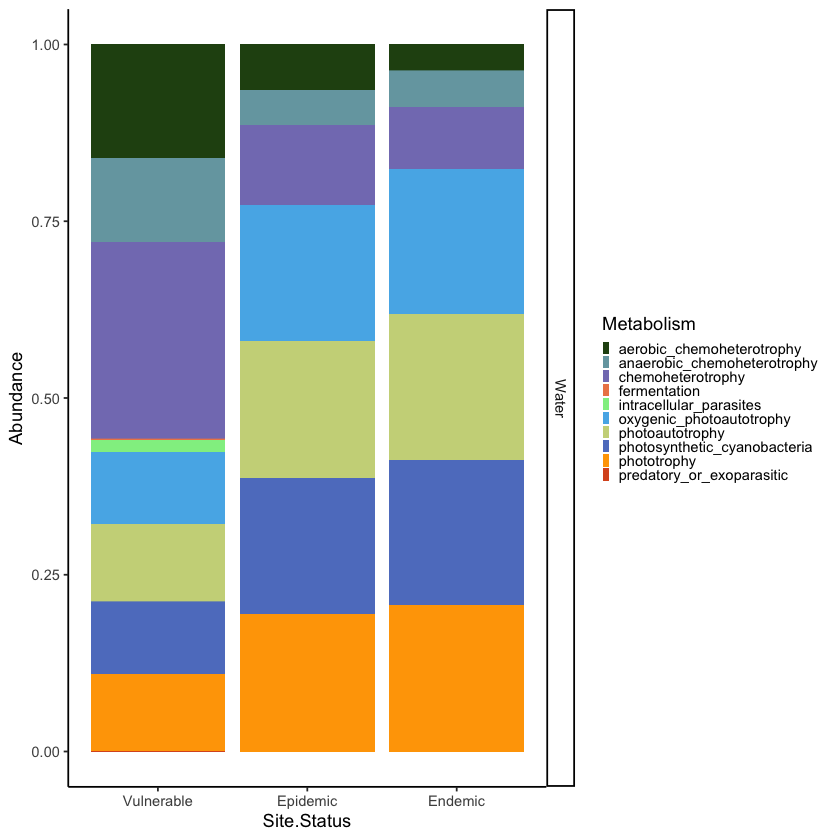

In [74]:

sum_far %>%
filter(Abundance>=0.9) %>%
ggplot(aes(x =Site.Status, y=Abundance, fill=OTU)) + 
       
geom_bar(stat="identity", position="fill", aes(fill = OTU)) + 
#facet_grid(Samp_trip~Genotype, scales = "free") +
facet_grid(Type~., space="free") +
scale_fill_manual("Metabolism",values=c("#274e13","#76a5af","#837dbe", "#ed8655", "lightgreen",
                           "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic()   

In [84]:
meta_far_AH <- as(sample_data(ps_far_AH), "data.frame")

In [102]:
fit_data_coral = Maaslin2(
    input_data = otu_table(ps_far_AH), 
    input_metadata = meta_far_AH,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     max_significance=0.05,
     cores=4,
     random_effects = c('Site.Name', 'Species_sample', "Date"),
    #normalization = "TMM",
    output = "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/coral/faprotax/", 
    correction = "BH",
    fixed_effects = c("Site.Status"),
    reference = c("Site.Status,Vulnerable"))
     

2024-05-16 14:01:19.13096 WARNING::Input is a matrix, passing through as.data.frame() .
[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/coral/faprotax//maaslin2.log"
2024-05-16 14:01:19.286785 INFO::Writing function arguments to log file
2024-05-16 14:01:19.290872 INFO::Verifying options selected are valid
2024-05-16 14:01:19.291484 INFO::Determining format of input files
2024-05-16 14:01:19.291995 INFO::Input format is data samples as columns and metadata samples as rows
2024-05-16 14:01:19.294886 INFO::Formula for random effects: expr ~ (1 | Site.Name) + (1 | Species_sample) + (1 | Date)
2024-05-16 14:01:19.295455 INFO::Formula for fixed effects: expr ~  Site.Status
2024-05-16 14:01:19.296103 INFO::Filter data based on min abundance and min prevalence
2024-05-16 14:01:19.296516 INFO::Total samples in data: 117
2024-05-16 14:01:19.29693 INFO::Min samples required with min abundance for a feature not to be filtered: 11.700000
2024-05-

In [92]:
meta_far_s <- as(sample_data(ps_far_s), "data.frame")

In [106]:
fit_data_s = Maaslin2(
    input_data = otu_table(ps_far_s), 
    input_metadata = meta_far_s,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     max_significance=0.05,
     cores=4,
     random_effects = c('Site.Name', "Date"),
    #normalization = "TMM",
    output = "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/sediment//faprotax", 
    correction = "BH",
    fixed_effects = c("Site.Status"),
    reference = c("Site.Status,Vulnerable"))
     

2024-05-17 07:43:26.637104 WARNING::Input is a matrix, passing through as.data.frame() .
[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/sediment//faprotax/maaslin2.log"
2024-05-17 07:43:26.808214 INFO::Writing function arguments to log file
2024-05-17 07:43:26.81454 INFO::Verifying options selected are valid
2024-05-17 07:43:26.81562 INFO::Determining format of input files
2024-05-17 07:43:26.816605 INFO::Input format is data samples as columns and metadata samples as rows
2024-05-17 07:43:26.821394 INFO::Formula for random effects: expr ~ (1 | Site.Name) + (1 | Date)
2024-05-17 07:43:26.822282 INFO::Formula for fixed effects: expr ~  Site.Status
2024-05-17 07:43:26.823527 INFO::Filter data based on min abundance and min prevalence
2024-05-17 07:43:26.824205 INFO::Total samples in data: 90
2024-05-17 07:43:26.824803 INFO::Min samples required with min abundance for a feature not to be filtered: 9.000000
2024-05-17 07:43:26.826205 INF

In [94]:
meta_far_w <- as(sample_data(ps_far_w), "data.frame")

In [107]:
fit_data_w = Maaslin2(
    input_data = otu_table(ps_far_w), 
    input_metadata = meta_far_w,
     min_abundance = 0.0,
    analysis_method = "LM",
     transform = "LOG",
     max_significance=0.05,
     cores=4,
     random_effects = c('Site.Name', "Date"),
    #normalization = "TMM",
    output = "/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/water/faprotax", 
    correction = "BH",
    fixed_effects = c("Site.Status"),
    reference = c("Site.Status,Vulnerable"))
     

2024-05-17 07:43:34.102634 WARNING::Input is a matrix, passing through as.data.frame() .
[1] "Warning: Deleting existing log file: /Users/stephanie.rosales/Documents/Tissueloss/EPA2/Maslin/water/faprotax/maaslin2.log"
2024-05-17 07:43:34.217166 INFO::Writing function arguments to log file
2024-05-17 07:43:34.220839 INFO::Verifying options selected are valid
2024-05-17 07:43:34.221337 INFO::Determining format of input files
2024-05-17 07:43:34.22196 INFO::Input format is data samples as columns and metadata samples as rows
2024-05-17 07:43:34.224578 INFO::Formula for random effects: expr ~ (1 | Site.Name) + (1 | Date)
2024-05-17 07:43:34.22513 INFO::Formula for fixed effects: expr ~  Site.Status
2024-05-17 07:43:34.225798 INFO::Filter data based on min abundance and min prevalence
2024-05-17 07:43:34.226242 INFO::Total samples in data: 96
2024-05-17 07:43:34.226671 INFO::Min samples required with min abundance for a feature not to be filtered: 9.600000
2024-05-17 07:43:34.227606 INFO::T

In [119]:
test_df=fit_data_coral$results

In [104]:
head(test_df)

,feature,metadata,value,coef,stderr,pval,name,qval,N,N.not.zero
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>
1,nitrogen_fixation,Site.Status,Endemic,2.364854,0.4949731,5.497818e-06,Site.StatusEndemic,0.0004068385,117,64
2,nitrogen_fixation,Site.Status,Epidemic,2.049300,0.5070585,9.857904e-05,Site.StatusEpidemic,0.0036474246,117,64
3,nitrate_respiration,Site.Status,Epidemic,-3.249127,0.8684005,2.912207e-04,Site.StatusEpidemic,0.0053875831,117,80
4,nitrogen_respiration,Site.Status,Epidemic,-3.249127,0.8684005,2.912207e-04,Site.StatusEpidemic,0.0053875831,117,80
5,human_gut,Site.Status,Endemic,1.182898,0.3555177,1.185068e-03,Site.StatusEndemic,0.0146158418,117,17
6,mammal_gut,Site.Status,Endemic,1.182898,0.3555177,1.185068e-03,Site.StatusEndemic,0.0146158418,117,17


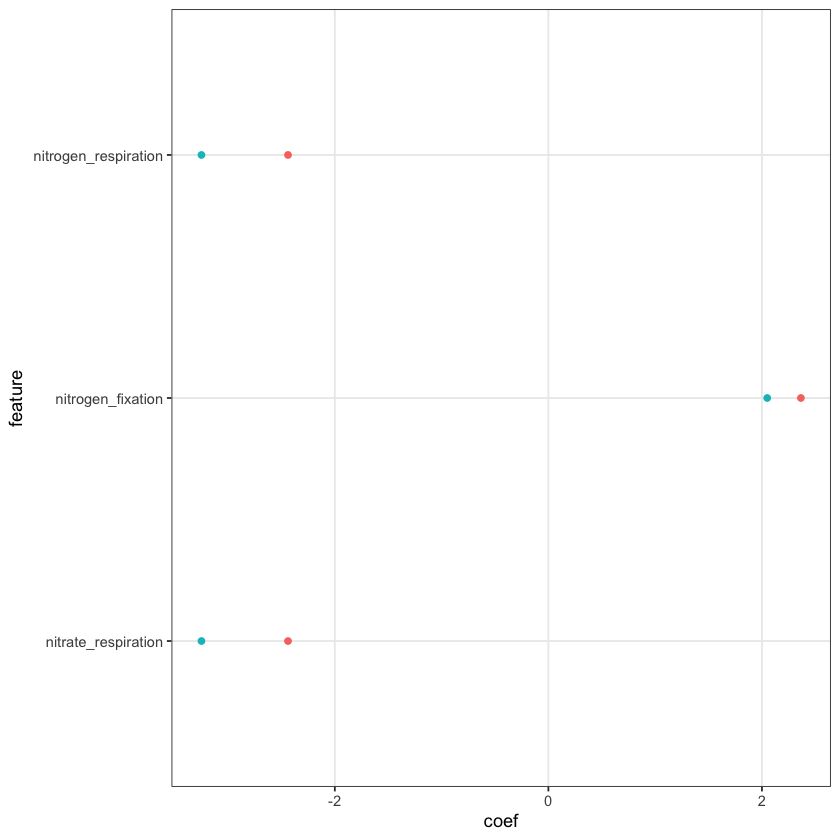

In [120]:
test_df %>%
filter(pval <0.01) %>%
filter(coef > 2 | coef < -2)  %>% 
ggplot( 
           aes(coef, y = feature)
              ) + 
geom_point(aes(color=value)) +

  theme_bw() + 
 theme(legend.position = "none",
       panel.grid.minor.x = element_blank()) 
#+
  
#geom_errorbar(aes(xmin = coef - stderr),
 #               width = 0.2,
  #              position = position_dodge(0.03), color = "black", alpha=0.5)

In [24]:
head(sum_far_AH)

,Sample,OTU,Abundance,samp,Sample.ID,Site,Site.Name,Region,Project,Objective,⋯,Types,Vul_coral,End_coral,Epi_coral,Vul_sed,End_sed,Epi_sed,Vul_wat,End_wat,Epi_wat
,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1364,CG.SINT.En4,intracellular_parasites,84.85,CG.SINT.En4_S6,CG.SINT.En4_S6,NA,Cliff.Green,Lower Keys,EPA2,cor,⋯,0,0,1,0,0,0,0,0,0,0
1622,CG.SINT4.H,intracellular_parasites,76.54,CG.SINT4.H_S3,CG.SINT4.H_S3,NA,Cliff.Green,Lower Keys,EPA2,cor,⋯,0,0,0,1,0,0,0,0,0,0
4213,XP.OFAV.En3,chemoheterotrophy,70.14,XP.OFAV.En3_S5,XP.OFAV.En3_S5,Site-G,Xesto.Patch,Lower Keys,EPA2,cor,⋯,0,0,1,0,0,0,0,0,0,0
1579,CG.SINT3.H,intracellular_parasites,68.60,CG.SINT3.H_S3,CG.SINT3.H_S3,NA,Cliff.Green,Lower Keys,EPA2,cor,⋯,0,0,0,1,0,0,0,0,0,0
945,CG.DSTO.En5,chemoheterotrophy,67.92,CG.DSTO.En5_S6,CG.DSTO.En5_S6,NA,Cliff.Green,Lower Keys,EPA2,cor,⋯,0,0,1,0,0,0,0,0,0,0
2880,LP.PSTR.En4,chemoheterotrophy,67.19,LP.PSTR.En4_S6,LP.PSTR.En4_S6,Site-H,Lindsays.Patch,Lower Keys,EPA2,cor,⋯,0,0,1,0,0,0,0,0,0,0


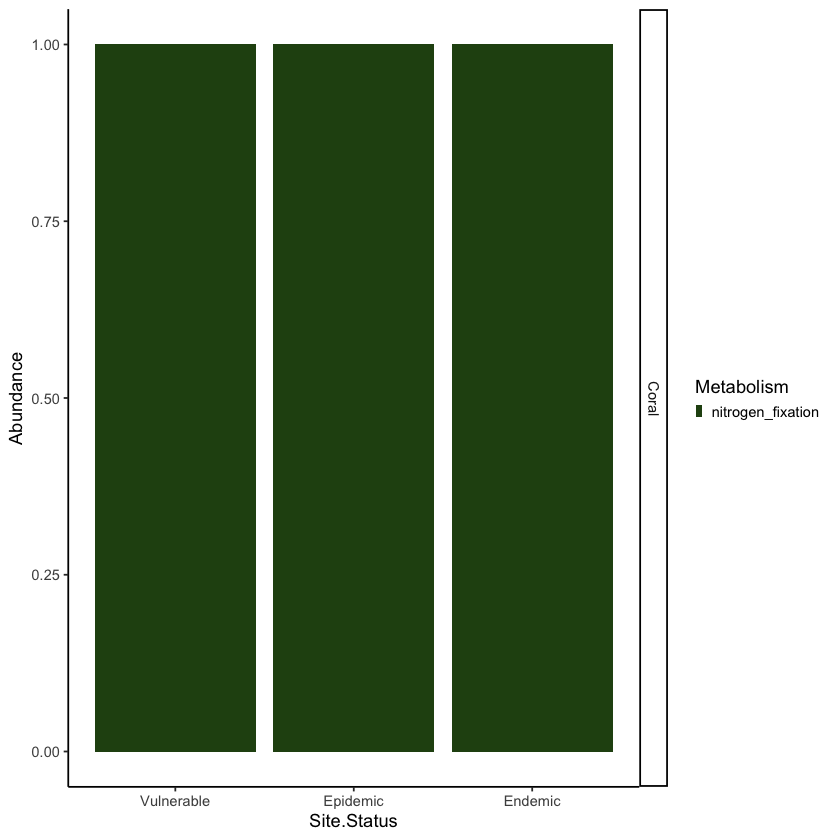

In [64]:
sig_ah=c(
    #"nitrogen_respiration", 
         "nitrogen_fixation" 
         #"nitrate_respiration"
)
sum_far_AH %>%
filter(OTU==sig_ah) %>%
#filter(Abundance>=0.9) %>%
ggplot(aes(x =Site.Status, y=Abundance, fill=OTU)) + 
       
geom_bar(stat="identity", position="fill", aes(fill = OTU)) + 
#facet_grid(Samp_trip~Genotype, scales = "free") +
facet_grid(Type~., space="free") +
scale_fill_manual("Metabolism",values=c("#274e13","#76a5af","#837dbe", "#ed8655", "lightgreen",
                           "#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#D14285", "#652926","#8569D5", 
                           "#5E738F", "#8A7C64","lightsalmon","aquamarine4",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                           "#CD9BCD", "gray80")) +
guides(fill = guide_legend(keywidth = 0.3, , keyheight =.50, ncol=1)) +
theme_classic()   

In [33]:
library(ggpubr)
my_comparisons = list( c("Vulnerable", "Epidemic"), c("Vulnerable", "Endemic"), c("Endemic", "Epidemic") )

In [39]:
colnames(sum_far_AH)

[1] "Sample"         "OTU"            "Abundance"      "samp"          
 [5] "Sample.ID"      "Site"           "Site.Name"      "Region"        
 [9] "Project"        "Objective"      "Type"           "Species_sample"
[13] "Sample.Type"    "Site.Status"    "Month"          "Year"          
[17] "Site_Num"       "Date"           "Vulnerable"     "Epidemic"      
[21] "Endemic"        "Sediment"       "Coral"          "Water"         
[25] "Zone"           "Types"          "Vul_coral"      "End_coral"     
[29] "Epi_coral"      "Vul_sed"        "End_sed"        "Epi_sed"       
[33] "Vul_wat"        "End_wat"        "Epi_wat"

Warning message in wilcox.test.default(c(0.4, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.4, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.761577310586391, 0.754983443527075, 0.547722557505166, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(1.56843871413581, 1.32664991614216, 1.0295630140987, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(1.56843871413581, 1.32664991614216, 1.0295630140987, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(5.75065213693195, 3.9496835316263, 3.08706980808663, :
“cannot compute exact p-value with ties”


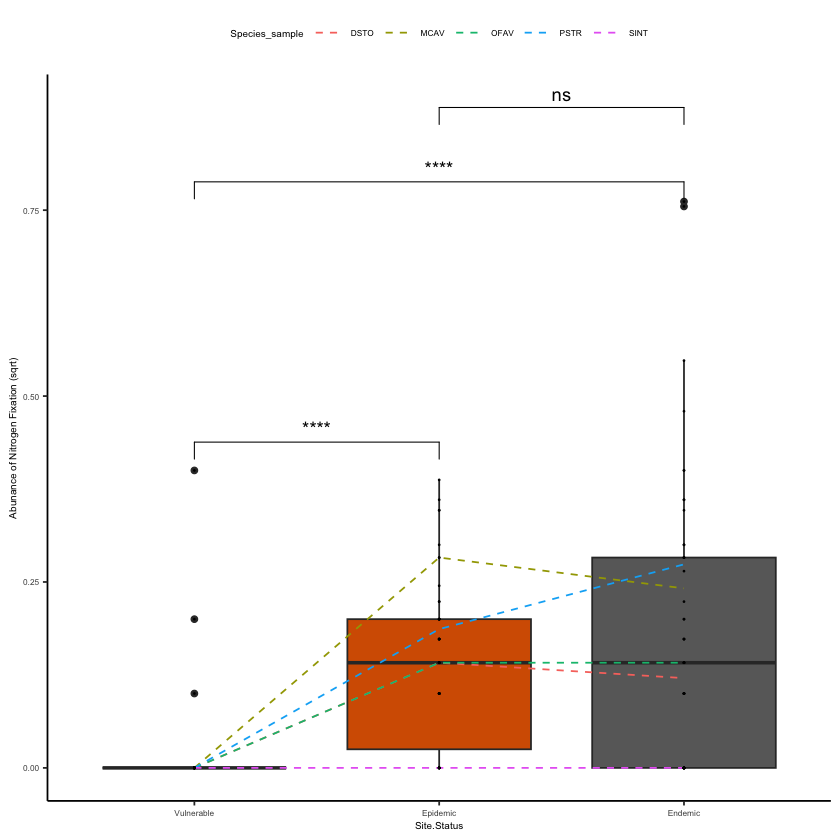

Warning message in wilcox.test.default(c(1.56843871413581, 1.32664991614216, 1.0295630140987, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(1.56843871413581, 1.32664991614216, 1.0295630140987, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(5.75065213693195, 3.9496835316263, 3.08706980808663, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(1.56843871413581, 1.32664991614216, 1.0295630140987, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(1.56843871413581, 1.32664991614216, 1.0295630140987, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(5.75065213693195, 3.9496835316263, 3.08706980808663, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.4, 0.2, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(0.4, 0.2, 0.1,

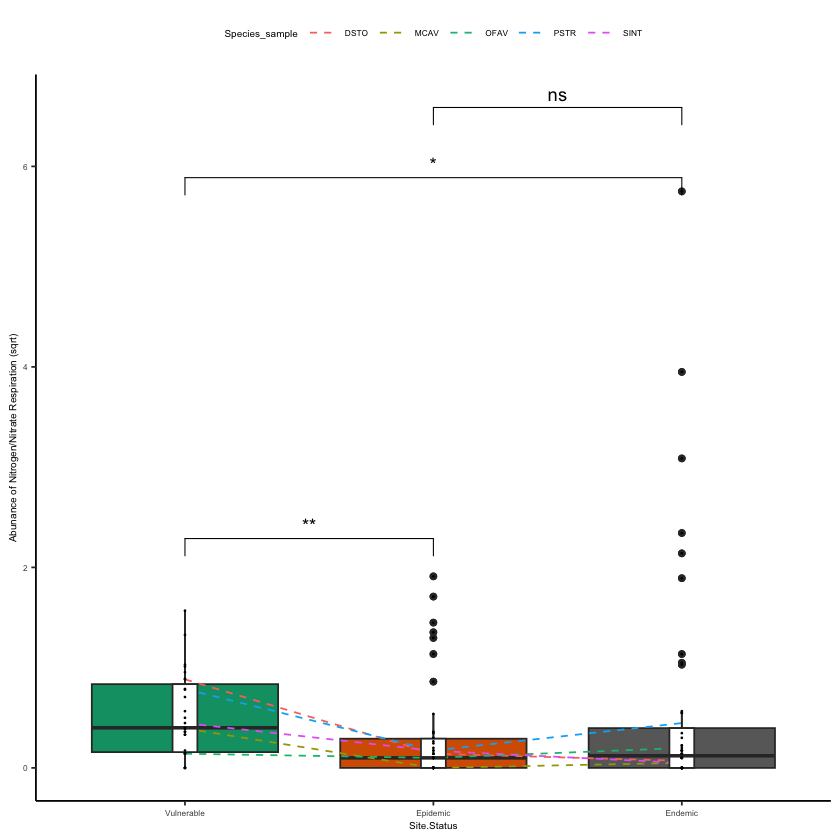

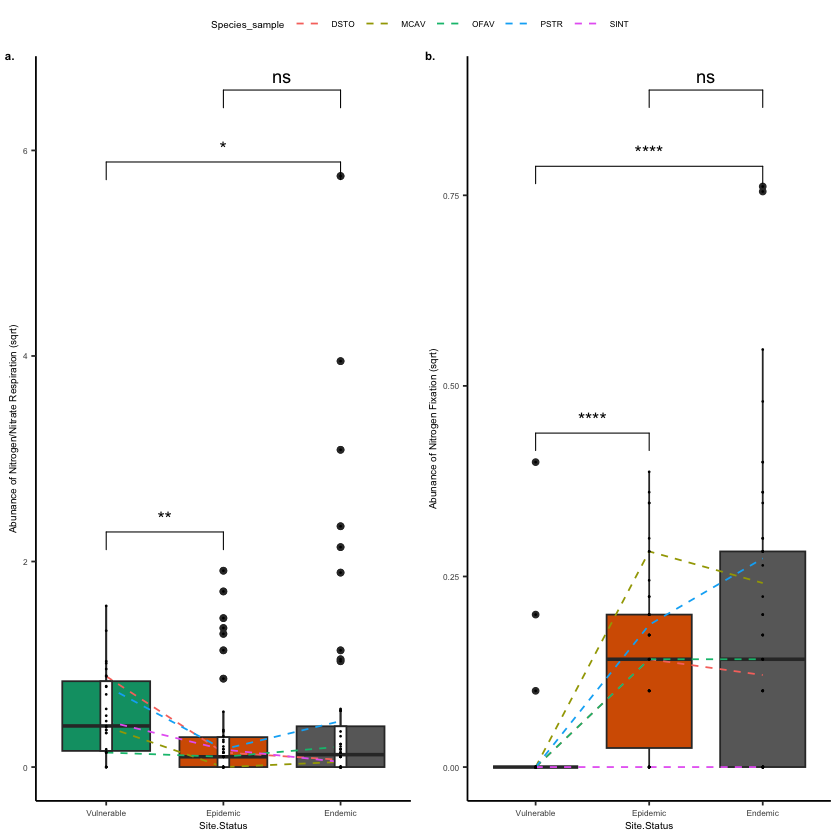

In [114]:
cbPalette <- c( "#009E73","#D55E00","#696969")
sig_ah=c("nitrogen_fixation")
fig_nf=sum_far_AH %>%
filter(OTU==sig_ah) %>%
ggplot(aes(x=Site.Status, y=sqrt(Abundance))) +
geom_boxplot(aes(fill=Site.Status)) +
stat_summary(
    fun.y = median,
    geom = 'line',
    linetype = "dashed",
    aes(group = Species_sample, color=Species_sample)
    #position = position_dodge(width = 0.9)  #this has to be added
  ) +
#geom_boxplot(width=0.1)+
geom_point(size=0.1) +
scale_fill_manual(values = cbPalette) +
theme_linedraw() +
#facet_wrap("Species_sample") +
theme_classic() +
#facet_grid(Type~., switch="y") +
ylab("Abundance") +
#facet_grid(.~OTU, space ="free", scales="free", switch="x") +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=6)) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +
guides(fill = "none",  shape = "none") +
theme(legend.position="top") +
 theme(strip.text = element_text(
    size = 6)) +
 theme(strip.text = element_text(
    size = 8, face="bold")) +
ylab("Abunance of Nitrogen Fixation (sqrt)") +
#theme(strip.background=element_rect(fill=NA, color=NA)) +
 stat_compare_means(comparisons = my_comparisons,label.y = c(0.4, 0.75, .85
                                                             ), aes(label = after_stat(p.signif)))

fig_nf


sig_ah=c("nitrogen_respiration")
fig_nr=sum_far_AH %>%
filter(OTU==sig_ah) %>%
ggplot(aes(x=Site.Status, y=sqrt(Abundance))) +
geom_boxplot(aes(fill=Site.Status)) +
stat_summary(
    fun.y = median,
    geom = 'line',
    linetype = "dashed",
    aes(group = Species_sample, color=Species_sample)
    #position = position_dodge(width = 0.9)  #this has to be added
  ) +
geom_boxplot(width=0.1)+
geom_point(size=0.1) +
scale_fill_manual(values = cbPalette) +
theme_linedraw() +
#facet_wrap("Species_sample") +
theme_classic() +
#facet_grid(Type~., switch="y") +
ylab("Abundance") +
#facet_grid(.~OTU, space ="free", scales="free", switch="x") +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=6)) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_text(size = 6)) +
theme(axis.text.x = element_text(size =5)) +
theme(axis.text.y = element_text(size =5)) +
guides(fill = "none",  shape = "none") +
theme(legend.position="top") +
 theme(strip.text = element_text(
    size = 6)) +
 theme(strip.text = element_text(
    size = 8, face="bold")) +
ylab("Abunance of Nitrogen/Nitrate Respiration (sqrt)") +
#theme(strip.background=element_rect(fill=NA, color=NA)) +
 stat_compare_means(comparisons = my_comparisons,label.y = c(2, 5.6, 6.3
                                                             ), aes(label = after_stat(p.signif)))

fig_nr

ggarrange(fig_nr, fig_nf, nrow = 1, ncol=2, common.legend = TRUE, legend="top", 
          font.label =list(size = 7, face = "bold"),
                           labels = c("a.","b."))

ggsave("/Users/stephanie.rosales/Documents/Tissueloss/EPA2/Figures/ffox.png",
     width = 4, height = 4, units = "in", dpi=300)

In [115]:
test_df=fit_data_w$results

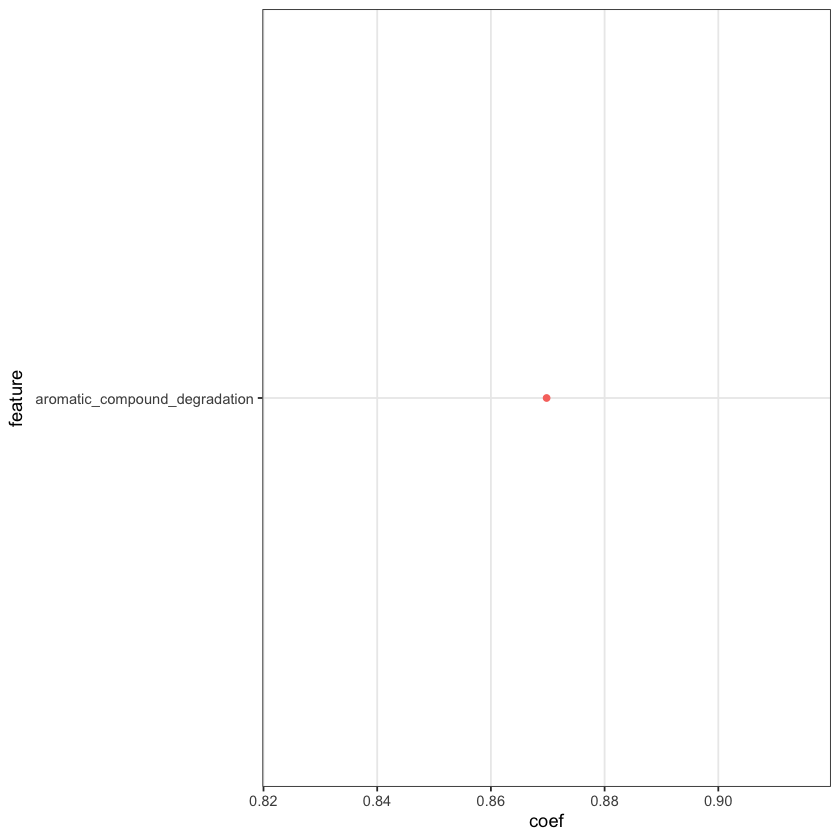

In [126]:
test_df=fit_data_w$results
test_df %>%
filter(pval <0.01) %>%
#filter(coef > 2 | coef < -2)  %>% 
ggplot( 
           aes(coef, y = feature)
              ) + 
geom_point(aes(color=value)) +

  theme_bw() + 
 theme(legend.position = "none",
       panel.grid.minor.x = element_blank()) 

In [123]:
test_df=fit_data_s$results

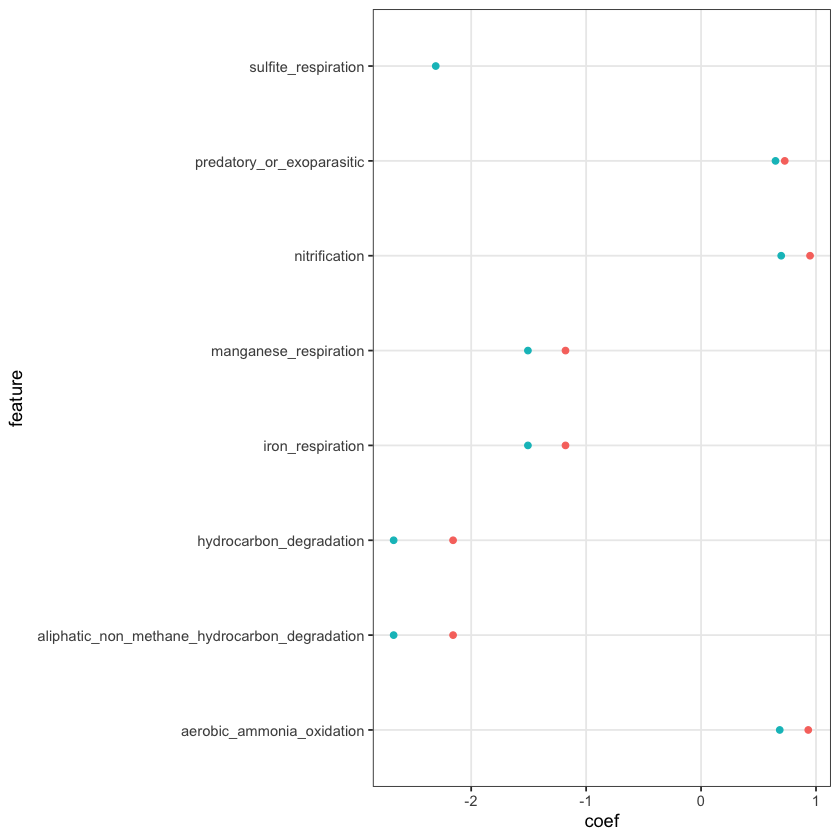

In [125]:
test_df %>%
filter(pval <0.01) %>%
#filter(coef > 2 | coef < -2)  %>% 
ggplot( 
           aes(coef, y = feature)
              ) + 
geom_point(aes(color=value)) +

  theme_bw() + 
 theme(legend.position = "none",
       panel.grid.minor.x = element_blank()) 